<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.datasets import make_blobs


### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [6]:
cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
# import labelencoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(cancer.diagnosis)
cancer['diagnosis_le'] = le.transform(cancer.diagnosis)

In [16]:
# set predictors and target to X and y

X = cancer.drop(['id','Unnamed: 32','diagnosis'], axis=1)
y= cancer.diagnosis_le

In [17]:
# import train_test_split and split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [18]:
# import logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [29]:
# predict test class:

logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [65]:
# predicted test probability:

prob = logreg.predict_proba(X_test)[:,1]

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [30]:
# ANSWER

#import sklearn confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_mat=confusion_matrix(y_test, y_pred)
report=classification_report(y_test, y_pred)
conf_mat

array([[112,   1],
       [  0,  58]], dtype=int64)

In [38]:
conf_matrix = pd.DataFrame(data= conf_mat, columns=['predicted_cancer','predicted_healthy'],\
                          index=['is_cancer', 'is_healthy'])

In [39]:
conf_matrix

,predicted_cancer,predicted_healthy
is_cancer,112,1
is_healthy,0,58


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [32]:
# ANSWER
# use float to perform true division, not integer division

tp = conf_mat[0,0]
tn = conf_mat[1,1]
fp = conf_mat[0,1]
fn = conf_mat[1,0]
acc = round((tp+tn) / (float(tp+tn+fp+fn)),2)
acc

0.99

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [33]:
# ANSWER

cl_err = round((fp+fn) / (float(tp+tn+fp+fn)),2)
cl_err

0.01

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [34]:
# ANSWER

sensitivity = tp / float(fn + tp)
sensitivity

1.0

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [35]:
# ANSWER

specificity = tn / (tn+ fp)
specificity

0.9830508474576272

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [36]:
# ANSWER

false_positive_rate = fp / float(tn + fp)
false_positive_rate

0.01694915254237288

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [37]:
# ANSWER

precision = tp / float(tp + fp)
precision

0.9911504424778761

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [0]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)

In [40]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_le
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [69]:
prob.shape, y_test.shape

((171,), (171,))

In [45]:
test_prob = pd.DataFrame(data=prob, columns=['class_0_pp','class_1_pp'])
test_prob

,class_0_pp,class_1_pp
0,9.989548e-01,0.001045
1,9.643850e-01,0.035615
2,9.987001e-01,0.001300
3,9.982320e-01,0.001768
4,4.199047e-02,0.958010
...,...,...
166,3.310685e-13,1.000000
167,1.529190e-01,0.847081
168,9.793197e-01,0.020680
169,9.894431e-01,0.010557


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

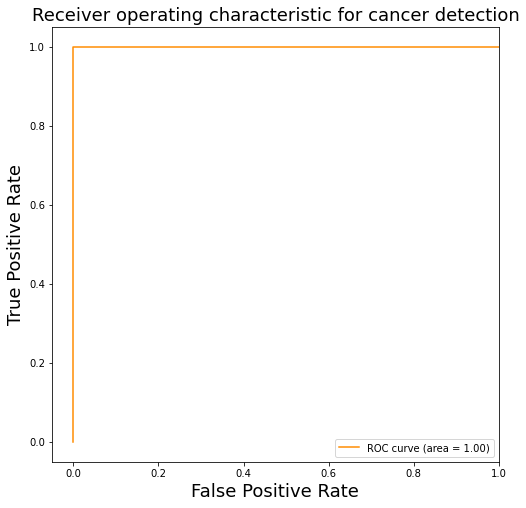

In [71]:
# For class 1, find the area under the curve
# Find fpr, tpr

fpr, tpr , threshold = roc_curve(y_test,test_prob.class_1_pp)

# Find auc
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, test_prob.class_1_pp)


# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
#plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.plot(fpr, tpr, color='darkorange',label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [72]:
auc

1.0

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



